In [1]:
import pygame
import OpenGL

import pygame
from pygame.locals import *
from OpenGL.GL import *
from OpenGL.GLU import *
from OpenGL.GLUT import *

from pylab import *
from numpy import *
from time import clock

In [2]:
vertices= (
    (1, -1, -1),
    (1, 1, -1),
    (-1, 1, -1),
    (-1, -1, -1),
    (1, -1, 1),
    (1, 1, 1),
    (-1, -1, 1),
    (-1, 1, 1)
    )
edges = (
    (0,1),
    (0,3),
    (0,4),
    (2,1),
    (2,3),
    (2,7),
    (6,3),
    (6,4),
    (6,7),
    (5,1),
    (5,4),
    (5,7)
    )
def Cube():
    glBegin(GL_LINES)
    for edge in edges:
        for vertex in edge:
            glVertex3fv(vertices[vertex])
    glEnd()
def main():
    pygame.init()
    display = (800,600)
    pygame.display.set_mode(display, DOUBLEBUF|OPENGL)

    gluPerspective(45, (display[0]/display[1]), 0.1, 50.0)

    glTranslatef(0.0,0.0, -5)

    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()

        glRotatef(1, 3, 1, 1)
        glClear(GL_COLOR_BUFFER_BIT|GL_DEPTH_BUFFER_BIT)
        Cube()
        pygame.display.flip()
        pygame.time.wait(10)


main()

error: video system not initialized

In [3]:
class Scene:
    def __init__(self):
        return None
        #self.camera = []
        self.objects = []
        self.lights = []
        #self.width = width
        #self.height = height
    def setCamera(pos,rot):
        self.camera = Camera(pos,rot)
    def setLookat(pos,look):
        self.camera = Camera(pos,V3.lookat(pos,look))
    

In [73]:
class presenter:
    def __init__(self,w=800,h=600):
        self.w,self.h = w,h
    
    def setScene(self,scene):
        self.scene = scene
    def draw(self):
        
        if self.map is None:
            self.map = random.randint(0,0xFFFFFFFF,size=(self.w,self.h), dtype=uint32)
        #cmap = self.raytrace(self.scene)
        glMatrixMode(GL_MODELVIEW)
        glMatrixMode(GL_PROJECTION)
        glLoadIdentity()

        #gluPerspective(90,1,0.01,1000)
        #glClear(GL_COLOR_BUFFER_BIT|GL_DEPTH_BUFFER_BIT)
        glLoadIdentity()
        #glPixelStorei(GL_UNPACK_ALIGNMENT,1)
        #glRotate(90,1,1,1)
        #glDrawPixels(self.w, self.h, GL_RGBA, GL_UNSIGNED_INT_8_8_8_8, ascontiguousarray(self.map.transpose()).data)
        #glDrawPixels(self.w, self.h, GL_RGBA, GL_UNSIGNED_INT_8_8_8_8, ascontiguousarray(self.map).data)
        #glRotate(90,1,1,1)
        #glFlush()
        #glTranslate(0.0, 0.0, -600)
        #glScale(50.0, 50.0, 50.0)
        #glRotate(90, 0.0, 0.0, 0.0)

        glEnable(GL_TEXTURE_2D)
        id = glGenTextures(1)
        glPixelStorei(GL_UNPACK_ALIGNMENT,1)
        glBindTexture(GL_TEXTURE_2D, id)
        glTexParameterf(GL_TEXTURE_2D, GL_TEXTURE_WRAP_S, GL_CLAMP)
        glTexParameterf(GL_TEXTURE_2D, GL_TEXTURE_WRAP_T, GL_CLAMP)
        glTexParameterf(GL_TEXTURE_2D, GL_TEXTURE_MAG_FILTER, GL_LINEAR)
        glTexParameterf(GL_TEXTURE_2D, GL_TEXTURE_MIN_FILTER, GL_LINEAR)
        glTexImage2D(GL_TEXTURE_2D, 0, GL_RGBA, self.w, self.h, 0, GL_RGBA, GL_UNSIGNED_INT_8_8_8_8, self.map.data)
        
        x,y,w,h,angle = 0,0,4,4,0
        glTexEnvf(GL_TEXTURE_ENV, GL_TEXTURE_ENV_MODE, GL_DECAL)
        glPushMatrix()
        glTranslatef(x, y, 0.0)
        glRotatef(angle, 0.0, 0.0, 1.0)

        glBindTexture(GL_TEXTURE_2D, id)
        glEnable(GL_TEXTURE_2D)
        
        glBegin(GL_QUADS)
        glTexCoord2f(0.0, 0.0)
        glVertex3f(x, y, 0.0)
        glTexCoord2f(0.0, 2.0)
        glVertex3f(x, y + h, 0.0)
        glTexCoord2f(2.0, 2.0)
        glVertex3f(x + w, y + h, 0.0)
        glTexCoord2f(2.0, 0.0)
        glVertex3f(x + w, y, 0.0)
        glEnd();

        glPopMatrix();
        #Cube()
    def start(self):
        pygame.init()
        display = (self.w,self.h)
        pygame.display.set_mode(display, DOUBLEBUF|OPENGL)
        #gluPerspective(45, (display[0]/display[1]), 0.1, 50.0)
        #glTranslatef(0.0,0.0, -5)
        glMatrixMode(GL_MODELVIEW)
        glLoadIdentity();
        glTranslatef( 0, 0, -15 ) 
        while True:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()

            #glRotatef(1, 3, 1, 1)
            #glClear(GL_COLOR_BUFFER_BIT|GL_DEPTH_BUFFER_BIT)
            self.draw()
            pygame.display.flip()
            pygame.time.wait(10)


In [5]:
scene = Scene()
scene.lights.append()
# List of objects.
    color_plane0 = 1. * np.ones(3)
    color_plane1 = 0. * np.ones(3)
    scene = [add_sphere([.75, .1, 1.], .6, [0., 0., 1.]),
             add_sphere([-.75, .1, 2.25], .6, [.5, .223, .5]),
             add_sphere([-2.75, .1, 3.5], .6, [1., .572, .184]),
             add_plane([0., -.5, 0.], [0., 1., 0.],color_plane0,color_plane1),
        ]

    class light:
        i = 12
    Light = light()
    # Light position and color.
    Light.L = np.array([5., 5., -10.])
    Light.color_light = np.ones(3)

    # Default light and material parameters.
    Light.ambient = .05
    Light.diffuse_c = 1.
    Light.specular_c = 1.
    Light.specular_k = 50

IndentationError: unexpected indent (<ipython-input-5-e78f2f948c64>, line 4)

In [6]:
def normalize(x):
    x /= np.linalg.norm(x)
    return x

def intersect_plane(O, D, P, N):
    # Return the distance from O to the intersection of the ray (O, D) with the 
    # plane (P, N), or +inf if there is no intersection.
    # O and P are 3D points, D and N (normal) are normalized vectors.
    denom = np.dot(D, N)
    if np.abs(denom) < 1e-6:
        return np.inf
    d = np.dot(P - O, N) / denom
    if d < 0:
        return np.inf
    return d

def intersect_sphere(O, D, S, R):
    # Return the distance from O to the intersection of the ray (O, D) with the 
    # sphere (S, R), or +inf if there is no intersection.
    # O and S are 3D points, D (direction) is a normalized vector, R is a scalar.
    a = np.dot(D, D)
    OS = O - S
    b = 2 * np.dot(D, OS)
    c = np.dot(OS, OS) - R * R
    disc = b * b - 4 * a * c
    if disc > 0:
        distSqrt = np.sqrt(disc)
        q = (-b - distSqrt) / 2.0 if b < 0 else (-b + distSqrt) / 2.0
        t0 = q / a
        t1 = c / q
        t0, t1 = min(t0, t1), max(t0, t1)
        if t1 >= 0:
            return t1 if t0 < 0 else t0
    return np.inf

def intersect(O, D, obj):
    if obj['type'] == 'plane':
        return intersect_plane(O, D, obj['position'], obj['normal'])
    elif obj['type'] == 'sphere':
        return intersect_sphere(O, D, obj['position'], obj['radius'])

def get_normal(obj, M):
    # Find normal.
    if obj['type'] == 'sphere':
        N = normalize(M - obj['position'])
    elif obj['type'] == 'plane':
        N = obj['normal']
    return N

def get_color(obj, M):
    color = obj['color']
    if not hasattr(color, '__len__'):
        color = color(M)
    return color

def trace_ray(rayO, rayD,scene,Light,O):
    # Find first point of intersection with the scene.
    t = np.inf
    for i, obj in enumerate(scene):
        t_obj = intersect(rayO, rayD, obj)
        if t_obj < t:
            t, obj_idx = t_obj, i
    # Return None if the ray does not intersect any object.
    if t == np.inf:
        return
    # Find the object.
    obj = scene[obj_idx]
    # Find the point of intersection on the object.
    M = rayO + rayD * t
    # Find properties of the object.
    N = get_normal(obj, M)
    color = get_color(obj, M)
    toL = normalize(Light.L - M)
    toO = normalize(O - M)
    # Shadow: find if the point is shadowed or not.
    l = [intersect(M + N * .0001, toL, obj_sh) 
            for k, obj_sh in enumerate(scene) if k != obj_idx]
    if l and min(l) < np.inf:
        return
    # Start computing the color.
    col_ray = Light.ambient
    # Lambert shading (diffuse).
    col_ray += obj.get('diffuse_c', Light.diffuse_c) * max(np.dot(N, toL), 0) * color
    # Blinn-Phong shading (specular).
    col_ray += obj.get('specular_c', Light.specular_c) * max(np.dot(N, normalize(toL + toO)), 0) ** Light.specular_k * Light.color_light
    return obj, M, N, col_ray

def add_sphere(position, radius, color):
    return dict(type='sphere', position=np.array(position), 
        radius=np.array(radius), color=np.array(color), reflection=.5)

def add_plane(position, normal,color_plane0,color_plane1):
    return dict(
            type='plane', 
            position=np.array(position), 
            normal=np.array(normal),
            color=lambda M: (color_plane0 if (int(M[0] * 2) % 2) == (int(M[2] * 2) % 2) else color_plane1),
            diffuse_c=.75, specular_c=.5, reflection=.25)
def raytrace(w,h,scene):
    color_plane0 = 1. * np.ones(3)
    color_plane1 = 0. * np.ones(3)
    scene = [add_sphere([.75, .1, 1.], .6, [0., 0., 1.]),
             add_sphere([-.75, .1, 2.25], .6, [.5, .223, .5]),
             add_sphere([-2.75, .1, 3.5], .6, [1., .572, .184]),
             add_plane([0., -.5, 0.], [0., 1., 0.],color_plane0,color_plane1),
        ]

    class light:
        i = 12
    Light = light()
    # Light position and color.
    Light.L = np.array([5., 5., -10.])
    Light.color_light = np.ones(3)

    # Default light and material parameters.
    Light.ambient = .05
    Light.diffuse_c = 1.
    Light.specular_c = 1.
    Light.specular_k = 50

    depth_max = 5  # Maximum number of light reflections.
    col = np.zeros(3)  # Current color.
    O = np.array([0., 0.35, -1.])  # Camera.
    Q = np.array([0., 0., 0.])  # Camera pointing to.
    img = np.zeros((h, w, 3))

    r = float(w) / h
    # Screen coordinates: x0, y0, x1, y1.
    S = (-1., -1. / r + .25, 1., 1. / r + .25)

    # Loop through all pixels.
    for i, x in enumerate(np.linspace(S[0], S[2], w)):
        if i % 10 == 0:
            print(i / float(w) * 100, "%")
        for j, y in enumerate(np.linspace(S[1], S[3], h)):
            col[:] = 0
            Q[:2] = (x, y)
            D = normalize(Q - O)
            depth = 0
            rayO, rayD = O, D
            reflection = 1.
            # Loop through initial and secondary rays.
            while depth < depth_max:
                traced = trace_ray(rayO, rayD,scene,Light,O)
                if not traced:
                    break
                obj, M, N, col_ray = traced
                # Reflection: create a new ray.
                rayO, rayD = M + N * .0001, normalize(rayD - 2 * np.dot(rayD, N) * N)
                depth += 1
                col += reflection * col_ray
                reflection *= obj.get('reflection', 1.)
            img[h - j - 1, i, :] = np.clip(col, 0, 1)
    return img





In [9]:
img = raytrace(p.w,p.h,{})

0.0 %
5.0 %
10.0 %
15.0 %
20.0 %
25.0 %
30.0 %
35.0 %
40.0 %
45.0 %
50.0 %
55.00000000000001 %
60.0 %
65.0 %
70.0 %
75.0 %
80.0 %
85.0 %
90.0 %
95.0 %


In [75]:
p = presenter(200,200)
#img = np.ones((p.w, p.h, 4),dtype=uint32)
#print(np.shape(img[0:4]))
#random.randint(0,0xFFFFFFFF,size=(self.w,self.h), dtype=uint32)
#img[0:10][0:10] = 0x0000FFFF
#img[10:60][10:50] = 0xFFFFFFFF
#img[70:90][0:3] = 0xFF0000FF
#img = raytrace(p.w,p.h,{})
img2 = img
print(np.shape(img2))
img2 = np.concatenate((img2, np.ones((p.h, p.w,1))),axis=2)
p.map = img2.transpose()#*0xFFFFFFFF
print(np.shape(p.map))
#p.raytrace = raytrace
p.start()

(200, 200, 3)
(4, 200, 200)


error: video system not initialized

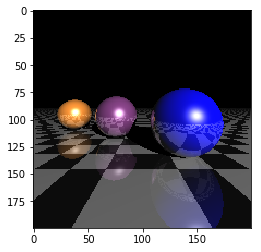

In [11]:
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline
imshow(img)